Importing the required libraries

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

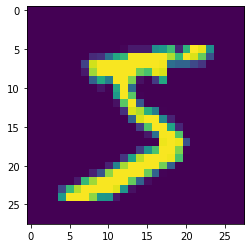

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
number_of_classes = 10

In [8]:
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create model

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 216s 115ms/step - loss: 0.2337 - accuracy: 0.9513 - val_loss: 0.0974 - val_accuracy: 0.9700
Epoch 2/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0706 - accuracy: 0.9784 - val_loss: 0.0728 - val_accuracy: 0.9775
Epoch 3/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0493 - accuracy: 0.9836 - val_loss: 0.0892 - val_accuracy: 0.9777
Epoch 4/5
1875/1875 [==============================] - 201s 107ms/step - loss: 0.0365 - accuracy: 0.9883 - val_loss: 0.0960 - val_accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0275 - accuracy: 0.9907 - val_loss: 0.1295 - val_accuracy: 0.9761


Test the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.1295168101787567, 0.9761000275611877]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 107ms/step
[[7.6972451e-16 2.0501706e-21 8.8064400e-12 2.5161347e-11 1.6427781e-20
  7.9515311e-22 1.3938738e-26 1.0000000e+00 1.8484173e-16 7.6239378e-13]
 [2.2020826e-11 3.8248653e-12 9.9999952e-01 6.1451251e-13 1.7155231e-15
  5.6349140e-20 4.3132951e-07 2.4869480e-22 1.5421556e-08 2.7992516e-18]
 [4.9800686e-08 9.9992561e-01 6.0386975e-09 4.2468236e-14 7.4220894e-05
  4.1702755e-08 1.8478247e-09 2.1545197e-09 1.2857646e-07 2.9005795e-12]
 [1.0000000e+00 1.0979235e-25 3.0244996e-17 2.2340822e-20 2.1275700e-18
  1.9675024e-16 2.5662103e-12 6.8542334e-21 1.0023975e-17 3.1245561e-14]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
